# Classificação com Redes Neurais Artificiais

Disciplina: Inteligência Artificial


Professores: Heloisa Camargo e Ricardo Cerri

Alunos: 

        Leticia Bossatto Marchezi        | RA: 791003
        Luís Augusto Simas do Nascimento | RA: 790828

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder

# Dataset
Escolheu-se o dataset entitulado "Bank Marketing Data Set", disponível em: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

O problema é referente a campanhas publicitárias realizadas por um banco Português, possuindo dados de seus clientes e tendo como output se o cliente contratou ou não um investimento de renda fixa.


Há 4 variações de datasets e o escolhido foi o arquivo bank-full.csv, pois há uma maior quantidade de exemplos.


O dataset em questão conta com 16 atributos, distribuídos entre numéricos, nominais e ordinais, além da classe de interesse (output) que é binário, podendo assumir os valores "yes" e "no"(positivo ou negativo). Ou seja, é uma tarefa de classificação com duas classes.



Como o dataset foi disponibilizado de forma compactada(em um arquivo .zip) no site original, o arquivo foi baixado e transferido para o Google Drive sem alguma modificação, possibilitando a aquisição direta pela biblioteca Pandas.

In [3]:
url = "https://drive.google.com/uc?export=download&id=1KBqD3xgLobqYBsiCdYSf8DkP2QaS9X3W"
df = pd.read_csv(url, delimiter=";")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Contando a ocorrência de dados de cada classe
Há um desbalanceamento entre as classes, apresentando amostras na proporção de 1-7,5 da classe positiva para a classe negativa.


In [5]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

## One hot encoding
Como o dataframe possui atributos nominais, foi necessária a aplicação da técnica One Hot Encoding, responsável por transformar as colunas nominais em atributos binários, gerando uma nova coluna para cada valor existente do atributo.

As colunas com valores nominais, como verificado abaixo, são:
'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month' e 'poutcome'.

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

A função get_dummies realiza o encoding e gera as novas colunas com o nome da coluna original + underscores + valor do dado.

In [9]:
df_ohe = pd.get_dummies(df, columns=categorical_cols)

In [10]:
df_ohe.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:
len(df_ohe)

45211

## OverSampling
Uso da técnica Smote para aumentar a quantidade de dados da classe minoritária ("yes"), igualando a quantidade de dados entre as duas classes.

In [12]:
target = df_ohe["y"]
X = df_ohe.drop(columns="y")

In [13]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, target)

In [14]:
y_res.value_counts()

no     39922
yes    39922
Name: y, dtype: int64

In [15]:
df_ohe=X_res
df_ohe['y']=y_res

## 10 Fold Cross-Validation

Posteriormente ocorre a separação em 10 conjuntos de dados para aplicar a estratégia de cross-validation, analisando a precisão da predição do modelo na prática.

Para a criação dos folds primeiro definiu-se uma função `kfold`, reponsável por particionar o conjunto de dados `data` em `nfolds` partições aleatórias.


A função kfold gera uma lista que contém as partições do dataframe. Como são 10 folds, a lista contém 10 elementos, ou 10 dataframes.
Para aleatorizar a distribuição dos dados, ocorre um embaralhamento dos índices. Tais índices serão distribuidos em cada iteração do loop, adicionando `número de linhas do dataframe // número de folds + 1 ` dados nos `número de linhas do dataframe % número de folds ` elementos e `número de linhas do dataframe // número de folds ` nas partições restantes.

A função acessa o slice do dataframe e o adiciona ao array de folds.

In [16]:
def kfold(data, nfolds):
  nrows = len(data)

  # Aleatorizando índices do dataframe
  indexes = np.arange(0, nrows)
  random.shuffle(indexes)

  lower = 0 
  upper = 0 

  folds = []

  # Número de partições que conterão nrows // nfolds + 1 elementos
  threshold = nrows % nfolds
  
  for i in range(nfolds):
    upper += nrows // nfolds + (1 if i < threshold else 0)

    folds.append(data.iloc[indexes[lower:upper]])

    lower = upper

  return folds

In [17]:
folds = kfold(df_ohe, 10)

Separando o target dos atributos do dataframe.

In [18]:
y = []
for i in range(10):
  y.append(folds[i].loc[:,"y"])
  folds[i] = folds[i].drop(columns="y")

Definindo datasets para treino e teste, 9 folds para treino e 1 para teste em cada iteração.

In [19]:
X_train = []
X_test = []
y_train = []
y_test = []
indexes = list(range(10))

for i in range(10):
  frames = [folds[x] for x in indexes if i!=x ]
  target = [y[x] for x in indexes if i!=x ]
  X_train.append(pd.concat(frames))
  y_train.append(pd.concat(target))
  X_test.append(folds[i])
  y_test.append(y[i])

# Treinamento

Com os dados de treinamento e teste selecionados para cada um dos 10 folds, o processo de treinamento dos modelos consiste em gerar as 10 redes neurais para então coletar as predições feitas por cada uma quando aplicadas ao conjunto de teste.

O método de otimização escolhido foi o gradiente descendente estocástico. A rede é composta de, além das camadas de entrada e saída, duas camadas escondidas com 50 neurônios cada. A escolha da arquitetura se deu através da análise do formato do conjunto de dados utilizado e de diversos testes empíricos. Além disso, ajustou-se também o parâmetro de *momentum*, um coeficiente que visa acelerar o processo de treinamento. 

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', random_state=1, hidden_layer_sizes=(50,50), momentum=0.5)

models = []
y_pred = []

for i in range(10):
  models.append(clf.fit(X_train[i], y_train[i]))
  y_pred.append(clf.predict(X_test[i]))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Coeficientes

Os coeficientes dos pesos entre as conexões de cada camada podem ser observados abaixo:

Pesos entre a camada de entrada e a camada escondida

In [21]:
models[0].coefs_[0]

array([[-0.03988556,  0.10514699, -0.24512976, ..., -0.12559842,
        -0.14304009, -0.19645683],
       [-0.2823119 , -0.00230487, -0.12897354, ..., -0.11090466,
        -0.1940238 , -0.00773838],
       [-0.09423721, -0.08220467,  0.18762569, ...,  0.07187878,
        -0.01440029, -0.24220378],
       ...,
       [ 0.20754815, -0.03760176, -0.20698663, ..., -0.16245468,
         0.0112038 ,  0.12909675],
       [-0.0182913 ,  0.17158892,  0.07821709, ...,  0.03320201,
        -0.07892561, -0.09012826],
       [ 0.22311234,  0.03321189,  0.07454421, ..., -0.21818511,
        -0.03939495,  0.06188861]])

Pesos entre a primeira camada escondida e a segunda

In [22]:
models[0].coefs_[1]

array([[-0.10620184, -0.0767136 , -0.10143262, ..., -0.00944476,
         0.15015106, -0.18739105],
       [ 0.05786821, -0.01106362, -0.09364717, ...,  0.13040872,
        -0.07051156,  0.00504752],
       [ 0.11550176,  0.14444612, -0.0501753 , ...,  0.14090404,
        -0.23731126, -0.11745509],
       ...,
       [-0.1276631 , -0.06371565, -0.16693085, ..., -0.11213522,
         0.20605849, -0.12911565],
       [ 0.08931635,  0.12504351, -0.26064401, ...,  0.05093929,
         0.23823567, -0.21078037],
       [ 0.09559583, -0.17747198,  0.05613365, ..., -0.16204779,
        -0.23889711,  0.03634742]])

Pesos entre a segunda camada escondida e a camada de saída:

In [23]:
models[0].coefs_[2]

array([[ 0.01642603],
       [ 0.08241799],
       [-0.15850521],
       [ 0.15829244],
       [ 0.19538804],
       [ 0.21019215],
       [-0.03612017],
       [ 0.10675186],
       [ 0.0723457 ],
       [ 0.29875149],
       [-0.11507102],
       [ 0.04907385],
       [-0.30468673],
       [ 0.22344411],
       [ 0.03446768],
       [-0.02436042],
       [-0.10222417],
       [ 0.16898981],
       [-0.11274808],
       [-0.09978806],
       [ 0.02127524],
       [ 0.01028848],
       [ 0.27063551],
       [-0.09291151],
       [-0.31213736],
       [-0.03673435],
       [-0.00168555],
       [-0.00381959],
       [ 0.14906898],
       [ 0.21098992],
       [-0.02737195],
       [-0.22815245],
       [ 0.04706191],
       [ 0.27214544],
       [-0.02569688],
       [ 0.12342382],
       [ 0.09655963],
       [-0.23984383],
       [-0.04338003],
       [ 0.01283242],
       [-0.14330811],
       [ 0.14129992],
       [ 0.21649133],
       [ 0.07281302],
       [ 0.17424293],
       [-0

# Avaliação dos modelos

Com os modelos e suas respectivas previsões, é possível obter as matrizes de confusão e as métricas de avaliação associadas a cada um dos folds.

In [24]:
from sklearn.metrics import classification_report

As métricas para cada fold são obtidas através da função `classification_report`, que fornece medidas de acurácia, precisão, recall e F1-score.

In [25]:
target_names = ['no', 'yes']
metrics = []

for i in range(10):
  print("Fold ", i)
  print(classification_report(y_test[i], y_pred[i], target_names=target_names))
  metrics.append(classification_report(y_test[i], y_pred[i], target_names=target_names, output_dict=True))
  print('-----------------------------------------------------')

Fold  0
              precision    recall  f1-score   support

          no       0.81      0.74      0.77      3948
         yes       0.76      0.83      0.80      4037

    accuracy                           0.78      7985
   macro avg       0.79      0.78      0.78      7985
weighted avg       0.79      0.78      0.78      7985

-----------------------------------------------------
Fold  1
              precision    recall  f1-score   support

          no       0.81      0.76      0.78      4043
         yes       0.77      0.81      0.79      3942

    accuracy                           0.79      7985
   macro avg       0.79      0.79      0.79      7985
weighted avg       0.79      0.79      0.79      7985

-----------------------------------------------------
Fold  2
              precision    recall  f1-score   support

          no       0.74      0.85      0.79      4028
         yes       0.82      0.69      0.75      3957

    accuracy                           0.77      7

Da mesma forma, as matrizes de confusão foram obtidas a partir dos valores esperados e os valores preditos por cada modelo.

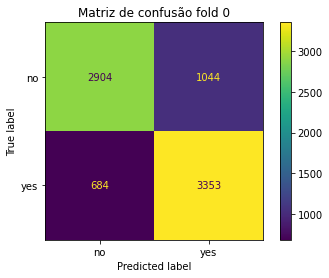

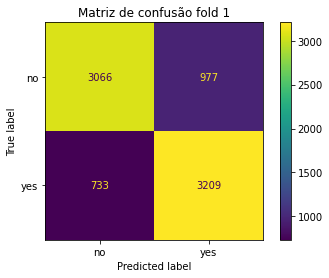

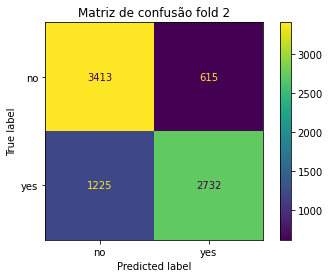

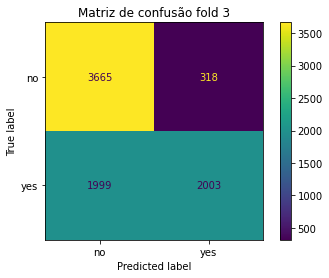

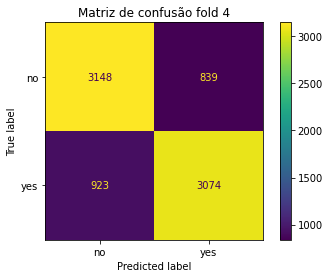

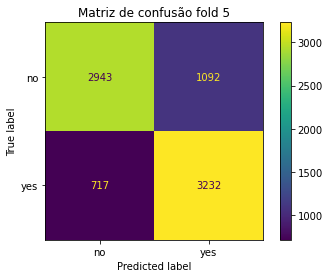

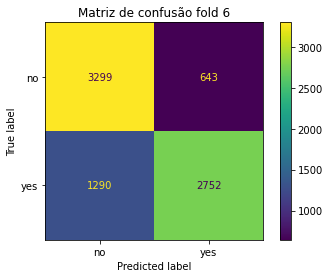

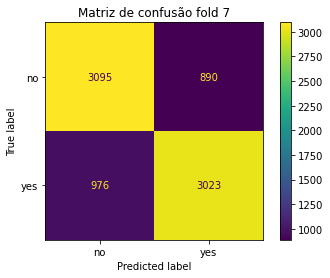

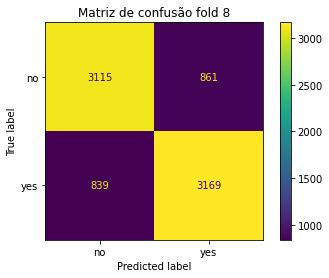

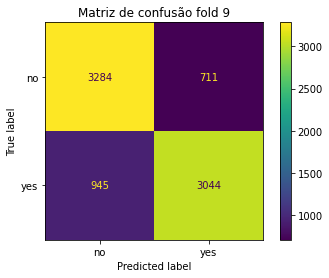

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for i in range(10):
  disp = ConfusionMatrixDisplay.from_predictions(y_test[i], y_pred[i])
  disp.ax_.set_title("Matriz de confusão fold {}".format(i))  
  plt.show()

## Média e desvio padrão dos resultados
Dadas a métricas coletadas para cada um dos modelos, vamos resumir os dados através da média e do desvio padrão.

In [27]:
precision = []
recall = []
f1score = []
accuracy = []

for metric in metrics:
  precision.append(metric['weighted avg']['precision'])
  recall.append(metric['weighted avg']['recall'])
  f1score.append(metric['weighted avg']['f1-score'])
  accuracy.append(metric['accuracy'])

metricsdf = pd.DataFrame({'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1score': f1score})

O sumário das métricas para cada modelo pode ser observado a seguir:

In [28]:
metricsdf

,accuracy,precision,recall,f1score
0,0.783594,0.785704,0.783594,0.783044
1,0.785848,0.787085,0.785848,0.785731
2,0.769568,0.775708,0.769568,0.768056
3,0.709831,0.755287,0.709831,0.696541
4,0.779309,0.779438,0.779309,0.779287
5,0.773422,0.776082,0.773422,0.773036
6,0.757891,0.765323,0.757891,0.756540
7,0.766283,0.766415,0.766283,0.766260
8,0.787074,0.787078,0.787074,0.787070
9,0.792585,0.793585,0.792585,0.792402


Calculando a média para cada uma das métricas obtem-se o seguinte resultado:

In [29]:
metricsdf.mean()

accuracy     0.770540
precision    0.777170
recall       0.770540
f1score      0.768797
dtype: float64

Ao obter o desvio padrão para cada métrica observa-se que a variação das métricas para cada fold é considerável, indicando variações médias de até $1.6\%$ nas métricas entre os diversos folds.

In [30]:
metricsdf.std()

accuracy     0.023837
precision    0.011936
recall       0.023837
f1score      0.027663
dtype: float64